In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Paths
base_dir = r"C:\Users\funwi\Downloads\potato-disease-api\PlantVillage"

In [3]:
# Parameters
img_size = (224, 224)
batch_size = 32
epochs = 20

In [4]:
# ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


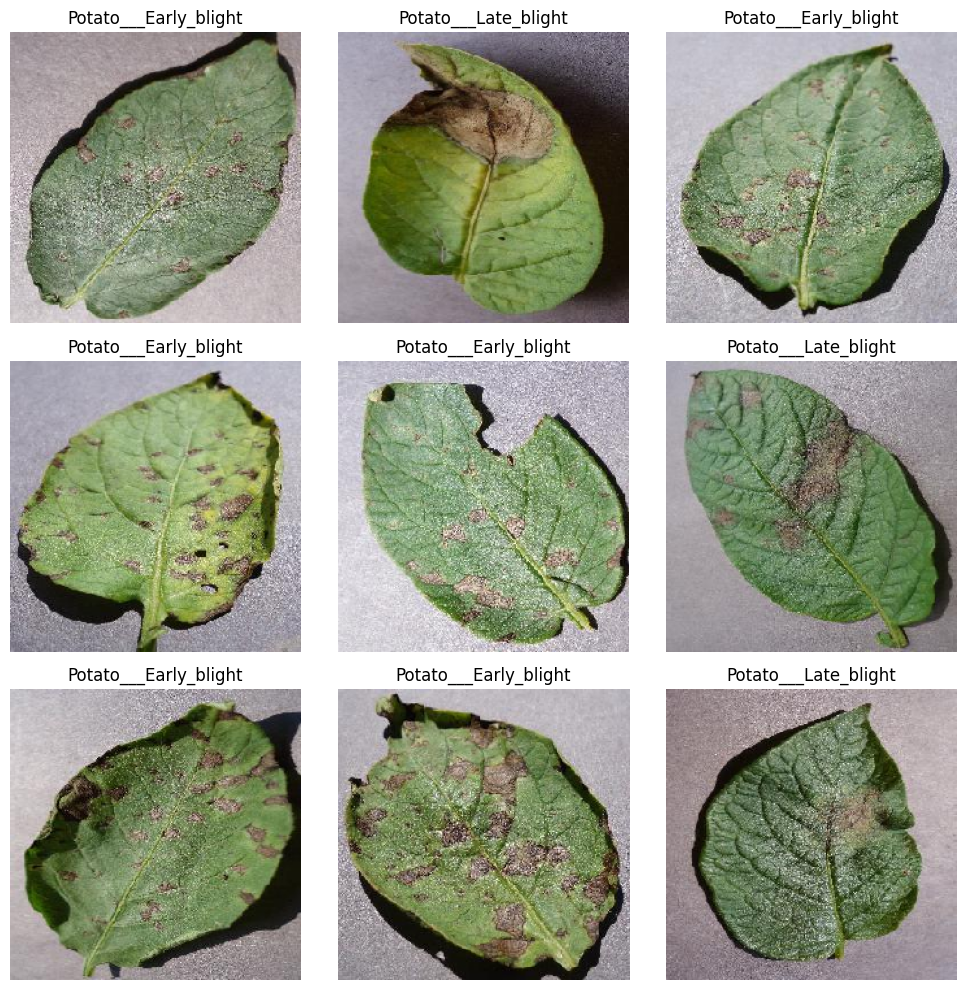

In [5]:
class_labels = list(train_generator.class_indices.keys())

def show_sample_images(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        label_idx = labels[i].argmax()
        plt.title(class_labels[label_idx])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_sample_images(train_generator)

In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/20
54/54 [==============================] - 94s 2s/step - loss: 0.8513 - accuracy: 0.6963 - val_loss: 0.4202 - val_accuracy: 0.8326
Epoch 2/20
54/54 [==============================] - 90s 2s/step - loss: 0.3143 - accuracy: 0.8792 - val_loss: 0.3232 - val_accuracy: 0.8791
Epoch 3/20
54/54 [==============================] - 88s 2s/step - loss: 0.2157 - accuracy: 0.9280 - val_loss: 0.2464 - val_accuracy: 0.9070
Epoch 4/20
54/54 [==============================] - 95s 2s/step - loss: 0.1298 - accuracy: 0.9553 - val_loss: 0.1885 - val_accuracy: 0.9279
Epoch 5/20
54/54 [==============================] - 90s 2s/step - loss: 0.0808 - accuracy: 0.9721 - val_loss: 0.1562 - val_accuracy: 0.9395
Epoch 6/20
54/54 [==============================] - 89s 2s/step - loss: 0.0473 - accuracy: 0.9832 - val_loss: 0.1874 - val_accuracy: 0.9186
Epoch 7/20
54/54 [==============================] - 88s 2s/step - loss: 0.0625 - accuracy: 0.9797 - val_loss: 0.1512 - val_accuracy: 0.9419
Epoch 8/20
54/54 [==

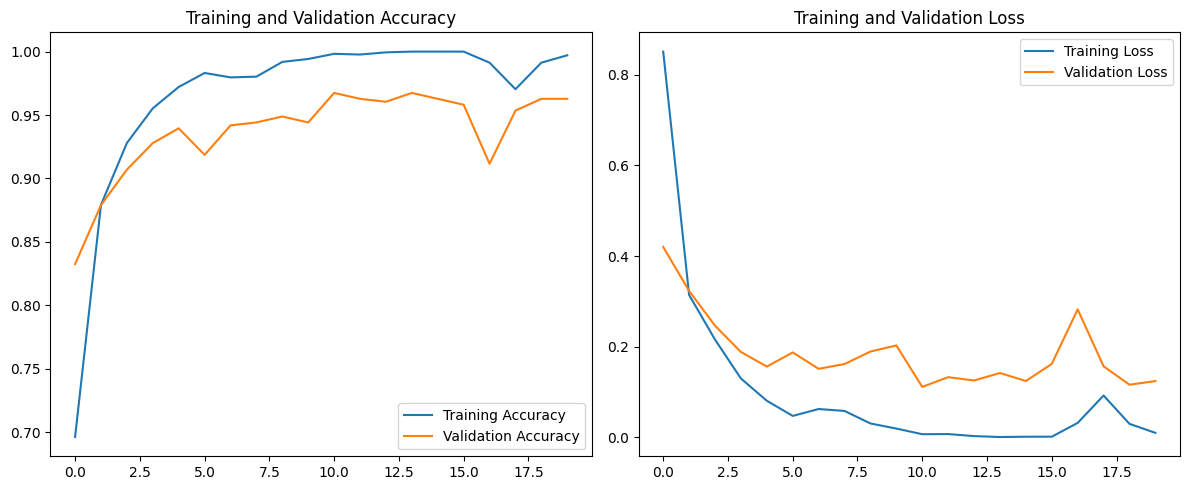

In [9]:
# Plot accuracy and loss
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [10]:
# Check final accuracy
print("Final Training Accuracy: {:.2f}%".format(history.history['accuracy'][-1] * 100))
print("Final Validation Accuracy: {:.2f}%".format(history.history['val_accuracy'][-1] * 100))

Final Training Accuracy: 99.71%
Final Validation Accuracy: 96.28%


In [11]:
# Save the model
model.save("potatoes.keras")
print("Model saved as 'potatoes.keras'")

Model saved as 'potatoes.keras'


In [15]:
# Save as a smaller model (e.g., use lower precision)
import tensorflow as tf

# Save the model in HDF5 format (older but still compatible)
model.save("potatoes.h5", include_optimizer=False)
print("Model saved as 'potatoes.h5'")

Model saved as 'potatoes.h5'


In [2]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("potatoes.h5")

# Create converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable float16 quantization (smallest loss, max compatibility)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# Convert the model
tflite_model = converter.convert()

# Save the quantized model
with open("potatoes.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Quantized model saved as 'potatoes.tflite'")


INFO:tensorflow:Assets written to: C:\Users\funwi\AppData\Local\Temp\tmpsupmw0ep\assets


INFO:tensorflow:Assets written to: C:\Users\funwi\AppData\Local\Temp\tmpsupmw0ep\assets


✅ Quantized model saved as 'potatoes.tflite'
